In [1]:
import scanpy as sc
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import numpy as np
import glob as glob

### HyDrop reads per cell

In [31]:
!cat /lustre1/project/stg_00002/lcb/fderop/data/20210428_hydrop-rna_mouse_cortex_10k/demultiplexed/HYR__c47998_e6244b__20210412_mouse_cortex_sbmerged_S4.Solo.out/Gene/Summary.csv

Number of Reads,269012338
Reads With Valid Barcodes,0.827878
Sequencing Saturation,0.659605
Q30 Bases in CB+UMI,0.780043
Q30 Bases in RNA read,0.954299
Reads Mapped to Genome: Unique+Multiple,0.859785
Reads Mapped to Genome: Unique,0.859785
Reads Mapped to Transcriptome: Unique+Multipe Genes,0.559121
Reads Mapped to Transcriptome: Unique Genes,0.550297
Estimated Number of Cells,4459
Reads in Cells Mapped to Unique Genes,50489518
Fraction of Reads in Cells,0.341061
Mean Reads per Cell,11323
Median Reads per Cell,9793
UMIs in Cells,16851724
Mean UMI per Cell,3779
Median UMI per Cell,3265
Mean Genes per Cell,1718
Median Genes per Cell,1624
Total Genes Detected,21483


In [33]:
269012338/4459

60330.194662480375

In [32]:
!cat /lustre1/project/stg_00002/lcb/fderop/data/20210428_hydrop-rna_mouse_cortex_10k/demultiplexed/HYR__666332__20210412_mouse_cortex_sa_S1.Solo.out/Gene/Summary.csv

Number of Reads,242071788
Reads With Valid Barcodes,0.83327
Sequencing Saturation,0.551516
Q30 Bases in CB+UMI,0.774848
Q30 Bases in RNA read,0.950998
Reads Mapped to Genome: Unique+Multiple,0.859084
Reads Mapped to Genome: Unique,0.859084
Reads Mapped to Transcriptome: Unique+Multipe Genes,0.56905
Reads Mapped to Transcriptome: Unique Genes,0.560225
Estimated Number of Cells,5232
Reads in Cells Mapped to Unique Genes,47987067
Fraction of Reads in Cells,0.353848
Mean Reads per Cell,9171
Median Reads per Cell,7941
UMIs in Cells,21186594
Mean UMI per Cell,4049
Median UMI per Cell,3514
Mean Genes per Cell,1778
Median Genes per Cell,1693
Total Genes Detected,21719


In [34]:
242071788/5232

46267.543577981654

In [35]:
# for a total of 
(269012338+242071788)/(4459+5232)

52738.01733567227

# DropSeq reads per cell

In [14]:
sorted(glob.glob('demultiplexed_dropseq/*.Solo.out/Gene/Summary.csv'))

['demultiplexed_dropseq/SRR1853178.Solo.out/Gene/Summary.csv',
 'demultiplexed_dropseq/SRR1853179.Solo.out/Gene/Summary.csv',
 'demultiplexed_dropseq/SRR1853180.Solo.out/Gene/Summary.csv',
 'demultiplexed_dropseq/SRR1853181.Solo.out/Gene/Summary.csv',
 'demultiplexed_dropseq/SRR1853182.Solo.out/Gene/Summary.csv',
 'demultiplexed_dropseq/SRR1853183.Solo.out/Gene/Summary.csv',
 'demultiplexed_dropseq/SRR1853184.Solo.out/Gene/Summary.csv']

In [23]:
metadata = []
for filename in sorted(glob.glob('demultiplexed_dropseq/*.Solo.out/Gene/Summary.csv')):
    x = pd.read_csv(filename, header=None, index_col = 0)
    sample=filename.replace('demultiplexed_dropseq/SRR18531', '')
    sample=sample.replace('.Solo.out/Gene/Summary.csv', '')
    x.columns = [sample]
    metadata.append(x)

metadata = pd.concat(metadata, axis = 1)
metadata = metadata.T

In [24]:
metadata

0   Number of Reads  Reads With Valid Barcodes  Sequencing Saturation  \
78      510210716.0                        1.0               0.757257   
79      524537760.0                        1.0               0.768773   
80      411365100.0                        1.0               0.830703   
81      486748074.0                        1.0               0.674636   
82      491102701.0                        1.0               0.771998   
83      438843919.0                        1.0               0.844932   
84      494030802.0                        1.0               0.725467   

0   Q30 Bases in CB+UMI  Q30 Bases in RNA read  \
78                  NaN               0.620940   
79                  NaN               0.620952   
80                  NaN               0.566498   
81                  NaN               0.608495   
82                  NaN               0.637598   
83                  NaN               0.591365   
84                  NaN               0.600765   

0   Reads Mapped to Genome: Unique+Multiple  Reads Mapped to Genome: Unique  \
78                                 0.545704                        0.545704   
79                                 0.543425                        0.543425   
80                                 0.542113                        0.542113   
81                                 0.332314                        0.332314   
82                                 0.535425                        0.535425   
83                                 0.551568                        0.551568   
84                                 0.562359                        0.562359   

0   Reads Mapped to Transcriptome: Unique+Multipe Genes  \
78                                           0.372239     
79                                           0.376026     
80                                           0.363961     
81                                           0.239943     
82                                           0.382315     
83                                           0.435267     
84                                           0.416486     

0   Reads Mapped to Transcriptome: Unique Genes  Estimated Number of Cells  \
78                                     0.362322                     2629.0   
79                                     0.365333                     2208.0   
80                                     0.353768                     1697.0   
81                                     0.233840                     1798.0   
82                                     0.372148                     2221.0   
83                                     0.423811                     2249.0   
84                                     0.405025                     1953.0   

0   Reads in Cells Mapped to Unique Genes  Fraction of Reads in Cells  \
78                             54743780.0                    0.296135   
79                             57388174.0                    0.299472   
80                             52238936.0                    0.358962   
81                             38185717.0                    0.335488   
82                             67329155.0                    0.368397   
83                             79424580.0                    0.427044   
84                             45691499.0                    0.228349   

0   Mean Reads per Cell  Median Reads per Cell  UMIs in Cells  \
78              20823.0                15973.0      7773057.0   
79              25991.0                19780.0      7713453.0   
80              30783.0                22655.0      4566499.0   
81              21237.0                15512.0      8390763.0   
82              30314.0                23341.0     10082819.0   
83              35315.0                26822.0      6949914.0   
84              23395.0                16929.0      8016444.0   

0   Mean UMI per Cell  Median UMI per Cell  Mean Genes per Cell  \
78             2956.0               2202.0               1651.0   
79             3493.0               2625.0 

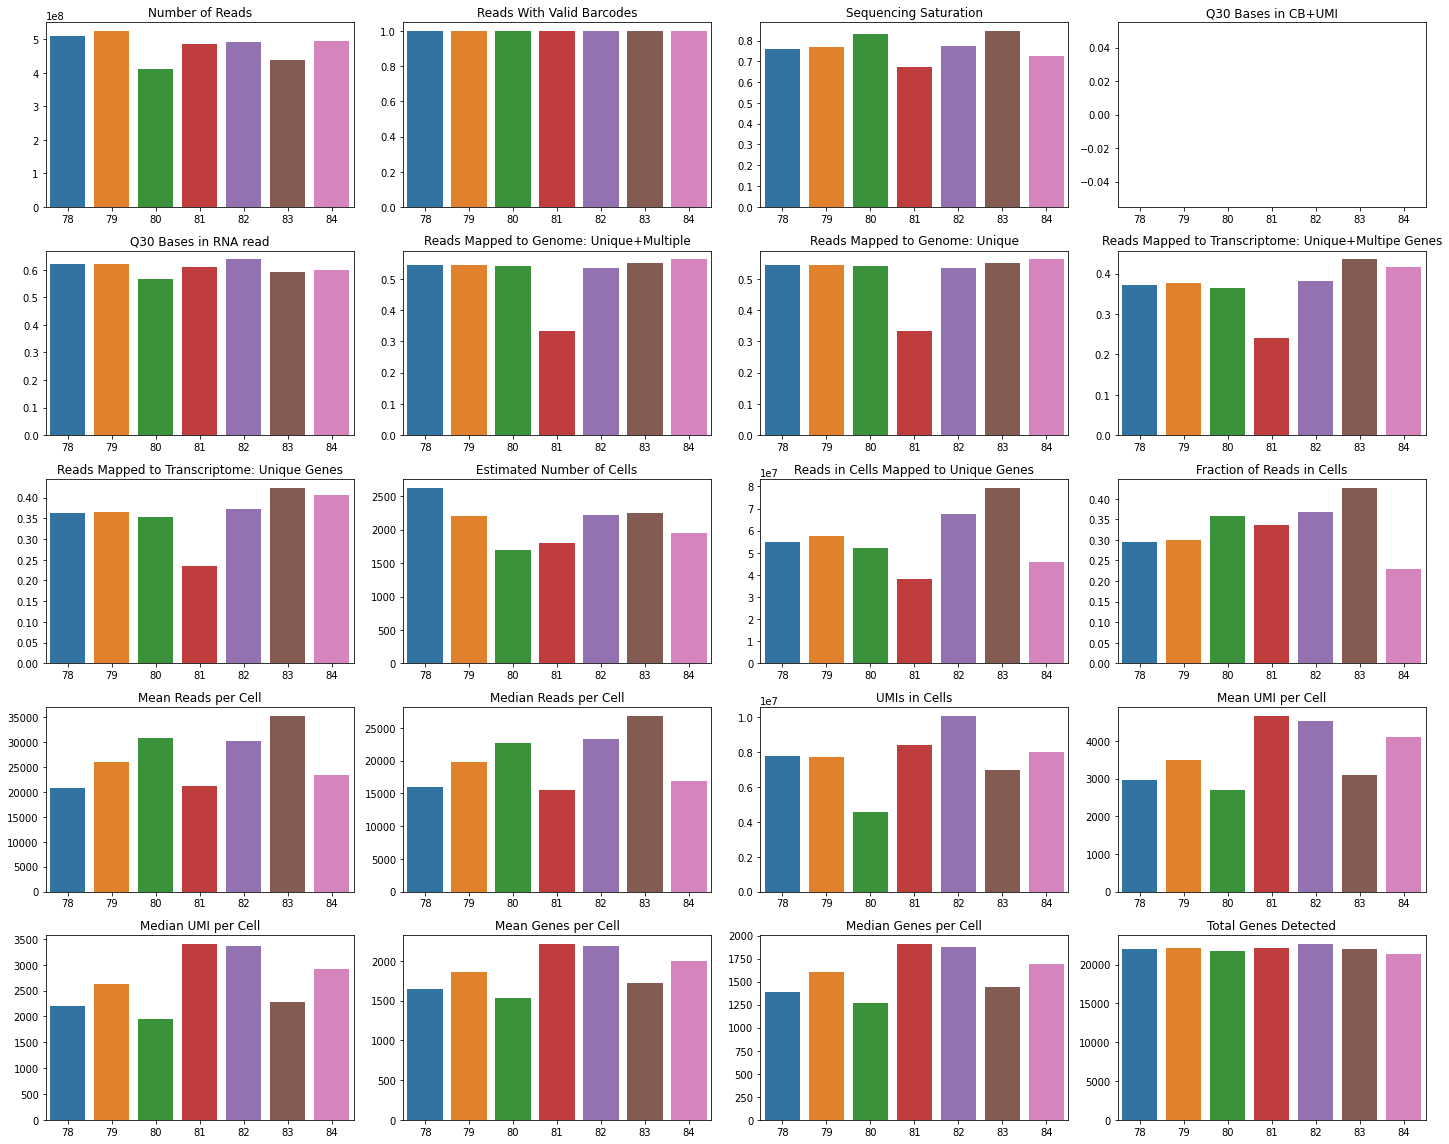

In [27]:
fig, axes =plt.subplots(5,4, figsize=(20,16))
axes = axes.flatten()
for statistic in range(0,metadata.shape[1]):
    sns.barplot(y = metadata[metadata.columns[statistic]], 
                x = metadata.index,
                ax = axes[statistic]
               ).set_title(metadata.columns[statistic])
    axes[statistic].set_ylabel('')
    # axes[statistic].get_xaxis().set_ticklabels([])

plt.tight_layout()
plt.gcf()
plt.savefig('plts_python/indrop_starsoloqc.png', dpi=150)
plt.show()
plt.close()

In [28]:
metadata['reads_per_cell'] = metadata['Number of Reads']/metadata['Estimated Number of Cells']

In [29]:
metadata['reads_per_cell']

78    194070.260936
79    237562.391304
80    242407.248085
81    270716.392659
82    221117.830257
83    195128.465540
84    252959.960061
Name: reads_per_cell, dtype: float64

However, are the cell counts correct? let's check the barcode rank

In [70]:
barcode_rank = []

for filename in sorted(glob.glob('demultiplexed_dropseq/*.Solo.out/Gene/UMIperCellSorted.txt')):
    x = pd.read_csv(filename, header=None)
    sample=filename.replace('demultiplexed_dropseq/SRR18531', '')
    sample=sample.replace('.Solo.out/Gene/UMIperCellSorted.txt', '')
    x.columns = [sample]
    barcode_rank.append(x)

barcode_rank_df = pd.concat(barcode_rank, axis = 1)

In [71]:
barcode_rank_df

78       79       80       81       82       83     84
0        41406.0  62367.0  31556.0  51504.0  40531.0  41327.0  58096
1        35519.0  41695.0  31014.0  51300.0  35922.0  36248.0  48799
2        30759.0  35492.0  26181.0  43563.0  34216.0  31154.0  42013
3        24208.0  26080.0  20343.0  40019.0  33016.0  29709.0  41568
4        23948.0  24701.0  20324.0  31841.0  32256.0  26778.0  38505
...          ...      ...      ...      ...      ...      ...    ...
7231648      NaN      NaN      NaN      NaN      NaN      NaN      1
7231649      NaN      NaN      NaN      NaN      NaN      NaN      1
7231650      NaN      NaN      NaN      NaN      NaN      NaN      1
7231651      NaN      NaN      NaN      NaN      NaN      NaN      1
7231652      NaN      NaN      NaN      NaN      NaN      NaN      1

[7231653 rows x 7 columns]

In [75]:
barcode_rank_df[0:500000]

78       79       80       81       82       83     84
0       41406.0  62367.0  31556.0  51504.0  40531.0  41327.0  58096
1       35519.0  41695.0  31014.0  51300.0  35922.0  36248.0  48799
2       30759.0  35492.0  26181.0  43563.0  34216.0  31154.0  42013
3       24208.0  26080.0  20343.0  40019.0  33016.0  29709.0  41568
4       23948.0  24701.0  20324.0  31841.0  32256.0  26778.0  38505
...         ...      ...      ...      ...      ...      ...    ...
499995      9.0      9.0      5.0      5.0      6.0      4.0     15
499996      9.0      9.0      5.0      5.0      6.0      4.0     15
499997      9.0      9.0      5.0      5.0      6.0      4.0     15
499998      9.0      9.0      5.0      5.0      6.0      4.0     15
499999      9.0      9.0      5.0      5.0      6.0      4.0     15

[500000 rows x 7 columns]

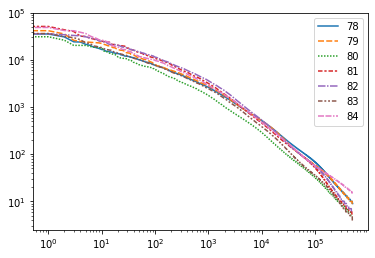

In [76]:
ax = sns.lineplot(data=barcode_rank_df[0:500000])
ax.set_xscale('log')
ax.set_yscale('log')

In [86]:
df_genes_dropseq = pd.read_csv('/lustre1/project/stg_00002/lcb/fderop/data/20210513_indrop_mouse_cortex/df_ngenes_cat_dropseq.csv', sep='\t')
df_umis_dropseq = pd.read_csv('/lustre1/project/stg_00002/lcb/fderop/data/20210513_indrop_mouse_cortex/df_numis_cat_dropseq.csv', sep='\t')
df_genes_dropseq.columns = ['bc', 'genes']
df_umis_dropseq.columns = ['bc', 'umis']

In [96]:
df_genes_dropseq

bc   genes
0      AACCCCTCCAGG  8373.0
1      GATCTATCGAAT  6493.0
2      CGCCAGGAATTT  6106.0
3      GTCACACCTGTT  5918.0
4      TTTTTAGGATGC  6127.0
...             ...     ...
49295  AGTAAGTAGCCA   289.0
49296  GACATCAAACAA   241.0
49297  AGTGTTTATCAA   248.0
49298  GCCGTGCGCTTG   259.0
49299  GCACTGCGTCTA   271.0

[49300 rows x 2 columns]

In [95]:
df_genes_dropseq.median(axis=0)

genes    518.0
dtype: float64

Ok, so it's near impossible to filter cells from here, basically.  
> PCA was first performed on a 13,155-cell “training set” of the 49,300-cell dataset, using single-cell libraries in which transcripts from >900 genes were detected. We found this approach was more effective in discovering structures corresponding to rare cell types than performing PCA on the full dataset, which was dominated by numerous, tiny rod photoreceptors (Supplemental Experimental Procedures). Thirty-two statistically significant PCs were identified using a permutation test and independently confirmed using a modified resampling procedure (Chung and Storey, 2015
). We projected individual cells within the training set based on their PC scores onto a single two-dimensional map using t-Distributed Stochastic Neighbor Embedding (t-SNE) (van der Maaten and Hinton, 2008
). The remaining 36,145 single-cell libraries (<900 genes detected) were next projected on this t-SNE map, based on their representation within the PC-subspace of the training set (Berman et al., 2014
, Shekhar et al., 2014
).

In [89]:
df_genes_dropseq[df_genes_dropseq['genes']>=900]

bc   genes
0      AACCCCTCCAGG  8373.0
1      GATCTATCGAAT  6493.0
2      CGCCAGGAATTT  6106.0
3      GTCACACCTGTT  5918.0
4      TTTTTAGGATGC  6127.0
...             ...     ...
44018  CGGAGAATCAAG   902.0
44041  CCTATAGTAGCA   922.0
44143  GCTGTTAGTACA  1070.0
44197  CAAGCAGTGGTA  1067.0
44501  TGGGGGGGGGGG   948.0

[13189 rows x 2 columns]

After all, they do seem to use all of their cells, so, we take the number of drop-seq cells as the number of lines in the supplementary drop-seq .tsv files, and use this number to downsample the drop-seq data. Then, I will take the top n cells from each downsampled matrix.

In [111]:
for file in sorted(glob.glob('/lustre1/project/stg_00002/lcb/fderop/data/20210513_indrop_mouse_cortex/*.bcs')):
    bcs = pd.read_csv(file, sep='\t')
    print(f'{file.replace("/lustre1/project/stg_00002/lcb/fderop/data/20210513_indrop_mouse_cortex/", "")}: {len(bcs.columns)-1}')

GSM1626793_P14Retina_1.digital_expression.txt.bcs: 6600
GSM1626794_P14Retina_2.digital_expression.txt.bcs: 9000
GSM1626795_P14Retina_3.digital_expression.txt.bcs: 6120
GSM1626796_P14Retina_4.digital_expression.txt.bcs: 7650
GSM1626797_P14Retina_5.digital_expression.txt.bcs: 7650
GSM1626798_P14Retina_6.digital_expression.txt.bcs: 8280
GSM1626799_P14Retina_7.digital_expression.txt.bcs: 4000


These are suspiciously round numbers... Yet, we don't have a better alternative. Let's continue. We need 52738 reads per cell.

In [112]:
for file in sorted(glob.glob('/lustre1/project/stg_00002/lcb/fderop/data/20210513_indrop_mouse_cortex/*.bcs')):
    bcs = pd.read_csv(file, sep='\t')
    print(f'{file.replace("/lustre1/project/stg_00002/lcb/fderop/data/20210513_indrop_mouse_cortex/", "")}: {(len(bcs.columns)-1)*52738}')

GSM1626793_P14Retina_1.digital_expression.txt.bcs: 348070800
GSM1626794_P14Retina_2.digital_expression.txt.bcs: 474642000
GSM1626795_P14Retina_3.digital_expression.txt.bcs: 322756560
GSM1626796_P14Retina_4.digital_expression.txt.bcs: 403445700
GSM1626797_P14Retina_5.digital_expression.txt.bcs: 403445700
GSM1626798_P14Retina_6.digital_expression.txt.bcs: 436670640
GSM1626799_P14Retina_7.digital_expression.txt.bcs: 210952000


Now, randomly sample from this in the following notebook.

# inDrop reads per cell

In [77]:
sorted(glob.glob('demultiplexed_indrop/*.Solo.out/Gene/Summary.csv'))

['demultiplexed_indrop/SRR10545068.Solo.out/Gene/Summary.csv',
 'demultiplexed_indrop/SRR10545069.Solo.out/Gene/Summary.csv',
 'demultiplexed_indrop/SRR10545070.Solo.out/Gene/Summary.csv',
 'demultiplexed_indrop/SRR10545071.Solo.out/Gene/Summary.csv',
 'demultiplexed_indrop/SRR10545072.Solo.out/Gene/Summary.csv',
 'demultiplexed_indrop/SRR10545073.Solo.out/Gene/Summary.csv',
 'demultiplexed_indrop/SRR10545074.Solo.out/Gene/Summary.csv']

In [37]:
metadata = []
for filename in sorted(glob.glob('demultiplexed_indrop/*.Solo.out/Gene/Summary.csv')):
    x = pd.read_csv(filename, header=None, index_col = 0)
    sample=filename.replace('demultiplexed_indrop/SRR105450', '')
    sample=sample.replace('.Solo.out/Gene/Summary.csv', '')
    x.columns = [sample]
    metadata.append(x)

metadata = pd.concat(metadata, axis = 1)
metadata = metadata.T

In [38]:
metadata

0   Number of Reads  Reads With Valid Barcodes  Sequencing Saturation  \
68      136252173.0                   0.440879               0.266368   
69      103036640.0                   0.381989               0.196112   
70       98859416.0                   0.408675               0.196926   
71      100660676.0                   0.391889               0.195025   
72      134789164.0                   0.416603               0.255584   

0   Q30 Bases in CB+UMI  Q30 Bases in RNA read  \
68             0.832998               0.800453   
69             0.732578               0.711272   
70             0.746938               0.710311   
71             0.739465               0.712597   
72             0.817862               0.798391   

0   Reads Mapped to Genome: Unique+Multiple  Reads Mapped to Genome: Unique  \
68                                 0.488978                        0.488978   
69                                 0.450167                        0.450167   
70                                 0.447653                        0.447653   
71                                 0.452498                        0.452498   
72                                 0.483215                        0.483215   

0   Reads Mapped to Transcriptome: Unique+Multipe Genes  \
68                                           0.301477     
69                                           0.249958     
70                                           0.264455     
71                                           0.255742     
72                                           0.284974     

0   Reads Mapped to Transcriptome: Unique Genes  Estimated Number of Cells  \
68                                     0.293621                    14363.0   
69                                     0.243351                    12538.0   
70                                     0.257502                    12668.0   
71                                     0.248998                    12618.0   
72                                     0.277531                    14249.0   

0   Reads in Cells Mapped to Unique Genes  Fraction of Reads in Cells  \
68                             24349722.0                    0.608644   
69                             14228154.0                    0.567445   
70                             14533296.0                    0.570907   
71                             14276253.0                    0.569584   
72                             22663375.0                    0.605839   

0   Mean Reads per Cell  Median Reads per Cell  UMIs in Cells  \
68               1695.0                 1432.0     17563343.0   
69               1134.0                  945.0     11255164.0   
70               1147.0                  955.0     11493802.0   
71               1131.0                  942.0     11315094.0   
72               1590.0                 1343.0     16585294.0   

0   Mean UMI per Cell  Median UMI per Cell  Mean Genes per Cell  \
68             1222.0               1044.0                896.0   
69              897.0                755.0                692.0   
70              907.0                764.0                699.0   
71              896.0                756.0                692.0   
72             1163.0                992.0                861.0   

0   Median Genes per Cell  Total Genes Detected  
68                  806.0               21125.0  
69                  612.0               20384.0  
70                  619.0               20493.0  
71                  612.0               20449.0  
72                  775.0               21013.0

! Note that all the below statistics which are calculated on STARsolo filtered cells are inaccurate for these samples, as STARsolo is unable to filter cells from background barcodes due to the weak knee in these samples.

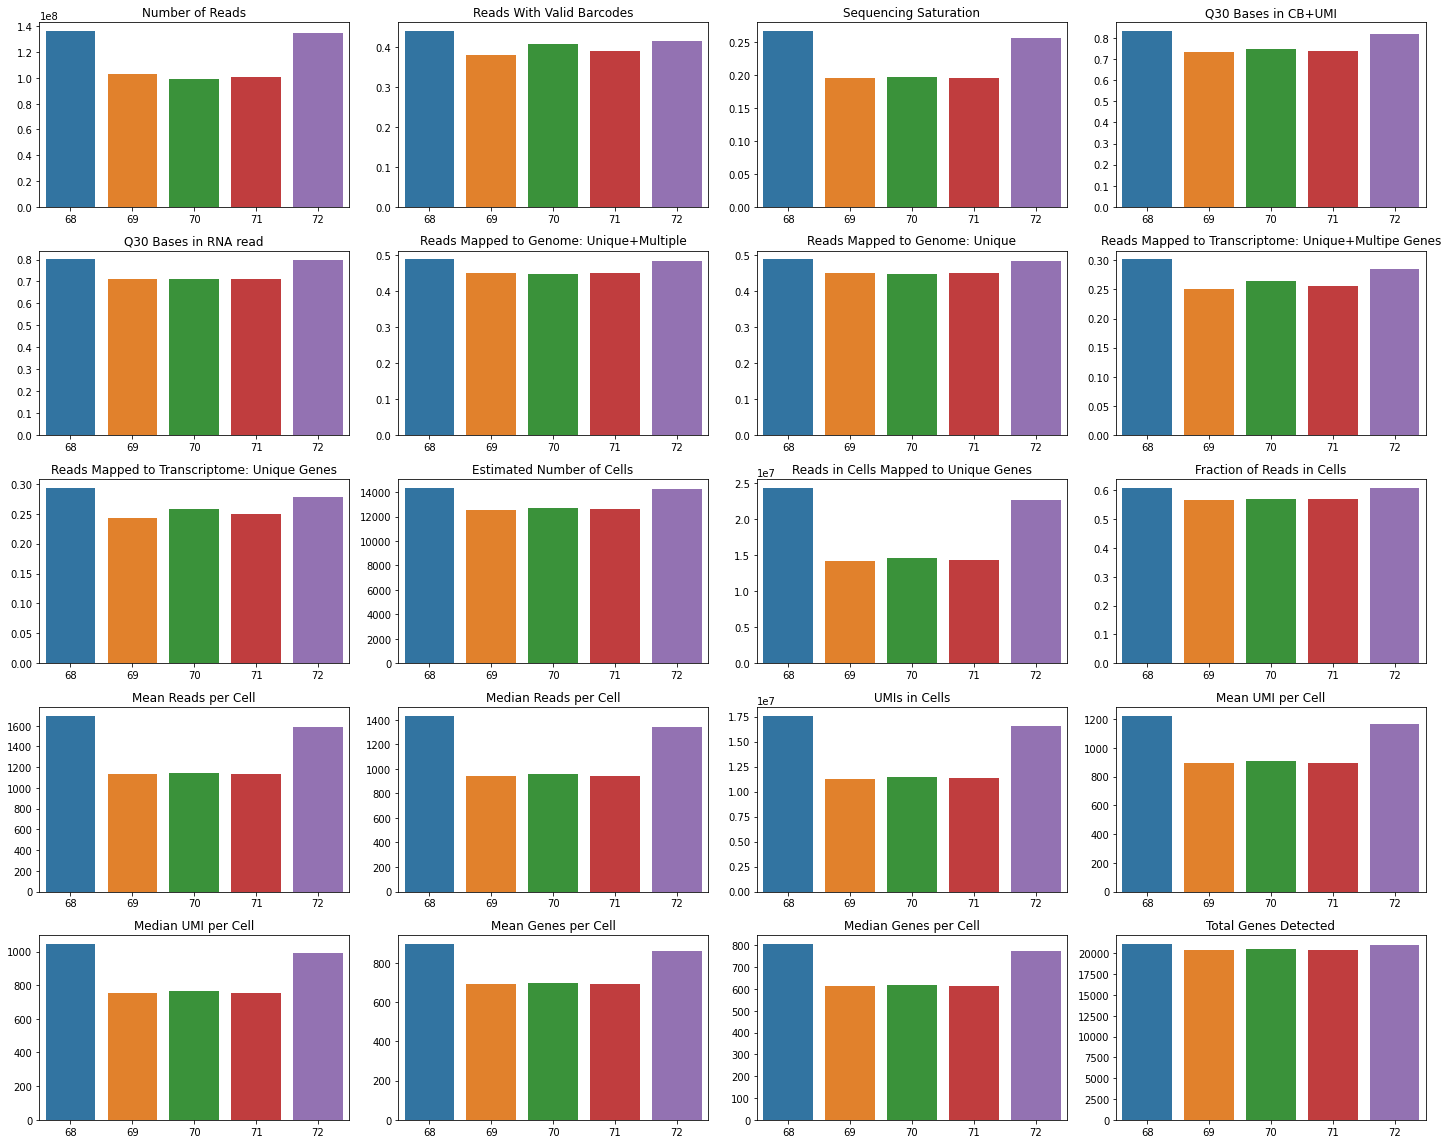

In [39]:
fig, axes =plt.subplots(5,4, figsize=(20,16))
axes = axes.flatten()
for statistic in range(0,metadata.shape[1]):
    sns.barplot(y = metadata[metadata.columns[statistic]], 
                x = metadata.index,
                ax = axes[statistic]
               ).set_title(metadata.columns[statistic])
    axes[statistic].set_ylabel('')
    # axes[statistic].get_xaxis().set_ticklabels([])

plt.tight_layout()
plt.gcf()
plt.savefig('plts_python/dropseq_starsoloqc.png', dpi=150)
plt.show()
plt.close()

In [40]:
metadata['reads_per_cell'] = metadata['Number of Reads']/metadata['Estimated Number of Cells']

In [41]:
metadata['reads_per_cell']

68    9486.331059
69    8217.948636
70    7803.869277
71    7977.546045
72    9459.552530
Name: reads_per_cell, dtype: float64

In [3]:
barcode_rank = []

for filename in sorted(glob.glob('demultiplexed_indrop/*.Solo.out/Gene/UMIperCellSorted.txt')):
    x = pd.read_csv(filename, header=None)
    sample=filename.replace('demultiplexed_indrop/SRR105450', '')
    sample=sample.replace('.Solo.out/Gene/UMIperCellSorted.txt', '')
    x.columns = [sample]
    barcode_rank.append(x)

barcode_rank_df = pd.concat(barcode_rank, axis = 1)

In [4]:
barcode_rank_df

68       69       70       71       72       73       74       75  \
0       16960  13597.0  13953.0  13676.0  16178.0  16420.0  16084.0  17290.0   
1       12395   8573.0   8751.0   8492.0  11513.0  11846.0  11469.0  11568.0   
2        8845   6572.0   6641.0   6514.0   8429.0   8431.0   8213.0   8075.0   
3        8543   6041.0   6300.0   6245.0   7850.0   8067.0   7957.0   8026.0   
4        8292   5921.0   5802.0   5983.0   7827.0   7999.0   7738.0   7786.0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
145125      1      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
145126      1      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
145127      1      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
145128      1      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
145129      1      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

             76       77       78       79  
0       16661.0  16806.0  16387.0  14197.0  
1       10942.0  10977.0  10536.0   8820.0  
2        7817.0   7865.0   7695.0   6890.0  
3        7813.0   7670.0   7595.0   6285.0  
4        7342.0   7302.0   7277.0   6053.0  
...         ...      ...      ...      ...  
145125      NaN      NaN      NaN      NaN  
145126      NaN      NaN      NaN      NaN  
145127      NaN      NaN      NaN      NaN  
145128      NaN      NaN      NaN      NaN  
145129      NaN      NaN      NaN      NaN  

[145130 rows x 12 columns]

In [5]:
barcode_rank_df[0:500000]

68       69       70       71       72       73       74       75  \
0       16960  13597.0  13953.0  13676.0  16178.0  16420.0  16084.0  17290.0   
1       12395   8573.0   8751.0   8492.0  11513.0  11846.0  11469.0  11568.0   
2        8845   6572.0   6641.0   6514.0   8429.0   8431.0   8213.0   8075.0   
3        8543   6041.0   6300.0   6245.0   7850.0   8067.0   7957.0   8026.0   
4        8292   5921.0   5802.0   5983.0   7827.0   7999.0   7738.0   7786.0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
145125      1      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
145126      1      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
145127      1      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
145128      1      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
145129      1      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

             76       77       78       79  
0       16661.0  16806.0  16387.0  14197.0  
1       10942.0  10977.0  10536.0   8820.0  
2        7817.0   7865.0   7695.0   6890.0  
3        7813.0   7670.0   7595.0   6285.0  
4        7342.0   7302.0   7277.0   6053.0  
...         ...      ...      ...      ...  
145125      NaN      NaN      NaN      NaN  
145126      NaN      NaN      NaN      NaN  
145127      NaN      NaN      NaN      NaN  
145128      NaN      NaN      NaN      NaN  
145129      NaN      NaN      NaN      NaN  

[145130 rows x 12 columns]

/staging/leuven/stg_00002/lcb/fderop/software_2/anaconda3/envs/python36/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


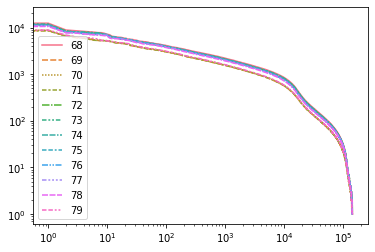

In [6]:
ax = sns.lineplot(data=barcode_rank_df[0:500000])
ax.set_xscale('log')
ax.set_yscale('log')

Again tough to tell where the true cells are.  
> After initial quality filtering (>500 genes detected per nucleus), the dataset of developmental samples contained 31,293 nuclei, detecting on average 1,913 transcripts (unique molecular identifiers [UMIs]) and 1,244 genes per nucleus (see SI Appendix, Fig. S1, for quality control metrics).

Let's see how many cells have > 500 genes. For this, we load the original count matrix:

In [24]:
files = glob.glob("/lustre1/project/stg_00002/lcb/fderop/data/20210513_indrop_mouse_cortex/GSE140883*.tsv")
files

['/lustre1/project/stg_00002/lcb/fderop/data/20210513_indrop_mouse_cortex/GSE140883_P10_2.tsv',
 '/lustre1/project/stg_00002/lcb/fderop/data/20210513_indrop_mouse_cortex/GSE140883_P15TR_1.tsv',
 '/lustre1/project/stg_00002/lcb/fderop/data/20210513_indrop_mouse_cortex/GSE140883_P20NR_2.tsv',
 '/lustre1/project/stg_00002/lcb/fderop/data/20210513_indrop_mouse_cortex/GSE140883_P15TR_2.tsv',
 '/lustre1/project/stg_00002/lcb/fderop/data/20210513_indrop_mouse_cortex/GSE140883_P15NR_1.tsv',
 '/lustre1/project/stg_00002/lcb/fderop/data/20210513_indrop_mouse_cortex/GSE140883_P15NR_2.tsv',
 '/lustre1/project/stg_00002/lcb/fderop/data/20210513_indrop_mouse_cortex/GSE140883_P20TR_1.tsv',
 '/lustre1/project/stg_00002/lcb/fderop/data/20210513_indrop_mouse_cortex/GSE140883_P10_1.tsv',
 '/lustre1/project/stg_00002/lcb/fderop/data/20210513_indrop_mouse_cortex/GSE140883_P20TR_2.tsv',
 '/lustre1/project/stg_00002/lcb/fderop/data/20210513_indrop_mouse_cortex/GSE140883_P20NR_1.tsv']

In [ ]:
df_numis_cat = pd.DataFrame()
df_ngenes_cat = pd.DataFrame()
for file in files:
    name = file.replace('/lustre1/project/stg_00002/lcb/fderop/data/20210513_indrop_mouse_cortex/', '')
    name = name.replace('.tsv', '')
    
    df = pd.read_csv(file, sep='\t', index_col=0)
    df_numis = df.sum(axis=1)
    df_ngenes = (df >= 1).astype(int).sum(axis=1)
    
    df_numis.to_csv(name + '.numis.tsv', sep='\t', header=None)
    df_ngenes.to_csv(name + '.ngenes.tsv', sep='\t', header=None)

In [56]:
barcode_rank = []

for filename in sorted(glob.glob('GSE140*.ngenes.tsv')):
    x = pd.read_csv(filename, header=None, sep='\t')
    sample=filename.replace('.tsv', '')
    x.columns = ['bc', sample]
    barcode_rank.append(x[sample])

barcode_rank_df = pd.concat(barcode_rank, axis = 1)

In [57]:
barcode_rank_df

GSE140883_P10_1.ngenes  GSE140883_P10_2.ngenes  \
0                      8270.0                  5468.0   
1                      2656.0                  2712.0   
2                      2428.0                  2377.0   
3                      1962.0                  1931.0   
4                      2089.0                  1930.0   
...                       ...                     ...   
16226                     NaN                     NaN   
16227                     NaN                     NaN   
16228                     NaN                     NaN   
16229                     NaN                     NaN   
16230                     NaN                     NaN   

       GSE140883_P15NR_1.ngenes  GSE140883_P15NR_2.ngenes  \
0                        6209.0                    6132.0   
1                        3224.0                    3703.0   
2                        2140.0                    2713.0   
3                        1958.0                    2357.0   
4                        1692.0                    2677.0   
...                         ...                       ...   
16226                       NaN                       NaN   
16227                       NaN                       NaN   
16228                       NaN                       NaN   
16229                       NaN                       NaN   
16230                       NaN                       NaN   

       GSE140883_P15TR_1.ngenes  GSE140883_P15TR_2.ngenes  \
0                          6254                    4346.0   
1                          3043                    1896.0   
2                          2702                    1531.0   
3                          2580                    1358.0   
4                          2060                    1364.0   
...                         ...                       ...   
16226                       160                       NaN   
16227                       156                       NaN   
16228                       151                       NaN   
16229                        96                       NaN   
16230                       148                       NaN   

       GSE140883_P20NR_1.ngenes  GSE140883_P20NR_2.ngenes  \
0                        6434.0                    8712.0   
1                        1973.0                    2328.0   
2                        1809.0                    1665.0   
3                        1634.0                    1402.0   
4                        1574.0                    1666.0   
...                         ...                       ...   
16226                       NaN                       NaN   
16227                       NaN                       NaN   
16228                       NaN                       NaN   
16229                       NaN                       NaN   
16230                       NaN                       NaN   

       GSE140883_P20TR_1.ngenes  GSE140883_P20TR_2.ngenes  
0                        5378.0                    6712.0  
1                        2324.0                    3151.0  
2                        2067.0                    1868.0  
3                        2194.0                    1872.0  
4                        1725.0                    1745.0  
...                         ...                       ...  
16226                       NaN                       NaN  
16227                       NaN                       NaN  
16228                       NaN                       NaN  
16229                       NaN                       NaN  
16230                       NaN                       NaN  

[16231 rows x 10 columns]

In [59]:
pd.DataFrame(barcode_rank_df >= 500).sum()

GSE140883_P10_1.ngenes      3600
GSE140883_P10_2.ngenes      2724
GSE140883_P15NR_1.ngenes    2082
GSE140883_P15NR_2.ngenes    2247
GSE140883_P15TR_1.ngenes    4128
GSE140883_P15TR_2.ngenes    2094
GSE140883_P20NR_1.ngenes    1995
GSE140883_P20NR_2.ngenes    1172
GSE140883_P20TR_1.ngenes    2550
GSE140883_P20TR_2.ngenes    2337
dtype: int64

In [61]:
pd.DataFrame(barcode_rank_df >= 500).sum().sum()

24929

In [62]:
pd.DataFrame(barcode_rank_df > 500).sum().sum()

24891

This does not match the > 30k as reported in Kalish et al. As noted in notebook 1, this is because they filter on umis instead of genes. This is an error in the manuscript.

In [49]:
barcode_rank = []

for filename in sorted(glob.glob('GSE140*.numis.tsv')):
    x = pd.read_csv(filename, header=None, sep='\t')
    sample=filename.replace('.tsv', '')
    x.columns = ['bc', sample]
    barcode_rank.append(x[sample])

barcode_rank_df = pd.concat(barcode_rank, axis = 1)

In [50]:
barcode_rank_df

GSE140883_P10_1.numis  GSE140883_P10_2.numis  GSE140883_P15NR_1.numis  \
0                    55128.0                19807.0                  26172.0   
1                     4567.0                 4734.0                   6491.0   
2                     4437.0                 3940.0                   3280.0   
3                     3076.0                 3037.0                   3074.0   
4                     3694.0                 3080.0                   2506.0   
...                      ...                    ...                      ...   
16226                    NaN                    NaN                      NaN   
16227                    NaN                    NaN                      NaN   
16228                    NaN                    NaN                      NaN   
16229                    NaN                    NaN                      NaN   
16230                    NaN                    NaN                      NaN   

       GSE140883_P15NR_2.numis  GSE140883_P15TR_1.numis  \
0                      22916.0                    24812   
1                       7789.0                     5438   
2                       4592.0                     4535   
3                       3875.0                     4415   
4                       4564.0                     3262   
...                        ...                      ...   
16226                      NaN                      183   
16227                      NaN                      183   
16228                      NaN                      171   
16229                      NaN                      110   
16230                      NaN                      164   

       GSE140883_P15TR_2.numis  GSE140883_P20NR_1.numis  \
0                      10792.0                  25732.0   
1                       2894.0                   3306.0   
2                       2175.0                   2746.0   
3                       1935.0                   2558.0   
4                       1884.0                   2374.0   
...                        ...                      ...   
16226                      NaN                      NaN   
16227                      NaN                      NaN   
16228                      NaN                      NaN   
16229                      NaN                      NaN   
16230                      NaN                      NaN   

       GSE140883_P20NR_2.numis  GSE140883_P20TR_1.numis  \
0                      59411.0                  17285.0   
1                       3986.0                   3797.0   
2                       2720.0                   3300.0   
3                       2213.0                   3452.0   
4                       2502.0                   2629.0   
...                        ...                      ...   
16226                      NaN                      NaN   
16227                      NaN                      NaN   
16228                      NaN                      NaN   
16229                      NaN                      NaN   
16230                      NaN                      NaN   

       GSE140883_P20TR_2.numis  
0                      31337.0  
1                       6276.0  
2                       2783.0  
3                       2869.0  
4                       2614.0  
...                        ...  
16226                      NaN  
16227                      NaN  
16228                      NaN  
16229                      NaN  
16230                      NaN  

[16231 rows x 10 columns]

In [54]:
pd.DataFrame(barcode_rank_df > 500).sum()

GSE140883_P10_1.numis      4951
GSE140883_P10_2.numis      3632
GSE140883_P15NR_1.numis    2369
GSE140883_P15NR_2.numis    2714
GSE140883_P15TR_1.numis    5791
GSE140883_P15TR_2.numis    2416
GSE140883_P20NR_1.numis    2203
GSE140883_P20NR_2.numis    1415
GSE140883_P20TR_1.numis    3101
GSE140883_P20TR_2.numis    2747
dtype: int64

In [53]:
pd.DataFrame(barcode_rank_df > 500).sum().sum()

31339

That looks more like it. 31,293 is the number reported in the manuscript. I can now use these cell numbers to downsample the fastqs to.

In [64]:
pd.DataFrame(barcode_rank_df > 500).sum()*52738

GSE140883_P10_1.ngenes      189540372
GSE140883_P10_2.ngenes      143500098
GSE140883_P15NR_1.ngenes    109536826
GSE140883_P15NR_2.ngenes    118291334
GSE140883_P15TR_1.ngenes    217175084
GSE140883_P15TR_2.ngenes    110380634
GSE140883_P20NR_1.ngenes    105106834
GSE140883_P20NR_2.ngenes     61703460
GSE140883_P20TR_1.ngenes    134323686
GSE140883_P20TR_2.ngenes    123143230
dtype: int64

therefore follows:
reads per sample required:
```
GSE140883_P10_1.ngenes      189540372
GSE140883_P10_2.ngenes      143500098
GSE140883_P15NR_1.ngenes    109536826
GSE140883_P15NR_2.ngenes    118291334
GSE140883_P15TR_1.ngenes    217175084
GSE140883_P15TR_2.ngenes    110380634
GSE140883_P20NR_1.ngenes    105106834
GSE140883_P20NR_2.ngenes     61703460
GSE140883_P20TR_1.ngenes    134323686
GSE140883_P20TR_2.ngenes    123143230
```
However, it was here that I discovered that the Kalish et al. data was not sample-demultiplexed, but a big, undemultiplexed pool of 10 conditions. It appears that the authors uploaded lane-split data to GEO, instead of condition-split. I found 12 SRR runs associated with this manuscript: SRR10545068 to SRR10545079 (https://www.ncbi.nlm.nih.gov/sra?LinkName=biosample_sra&from_uid=13412802)

From the `fastq-load.py` options specified on SRA, I deducted that these 12 SRR runs stem from 3 sequencing runs each split into 4 lanes.
```
    SRR10545075: AC021817_S0_L001
    SRR10545076: AC021817_S0_L002
    SRR10545077: AC021817_S0_L003
    SRR10545078: AC021817_S0_L004
    SRR10545079: AC021917_S0_L001
    SRR10545069: AC021917_S0_L002
    SRR10545070: AC021917_S0_L003
    SRR10545071: AC021917_S0_L004
    SRR10545068: AC022617_S0_L001
    SRR10545072: AC022617_S0_L002
    SRR10545073: AC022617_S0_L003
    SRR10545074: AC022617_S0_L004
```
And then, in the matadata, every sample is "associated" with every file. This is problematic. One could naively downsample the entire pooled data so that the depth matches `31339*52738 = 1652756182` reads. However, at 31k cells, and a whitelist of 147k, barcode collision is imminent. It is therefore that I need the indices used. In order to do that, I will now try to extract the barcodes myself. I will make a distribution of all sequences in R3. This should reflect a heavy bias towards the indices used.

Proceed to next notebook to see how that was done.

From the raw barcode counting, we find the following. The top 25 indices found are the following:

```
ACTCTAGG        16095561
CGGAGAGA        14974567
CTAGTCGA        13418313
CTTAATAG        12366598
ATTAGACG        11911075
AGCTAGAA        10436684
TCGCATAA        10137372
TCTTACGC        9862491
TAAGGCTC        9322569
ATAGCCTT        8961285
AGATCTCG        2129831
ATTAGCCG        318959
TAAGGCGC        299836
ACTCGAGG        285249
AGCGAGAA        271526
GGGGGGGG        260505
ATAGCCGT        227021
ATAGCCTG        221338
CTTAAAAG        216772
CTTAAGAG        193067
AATAGACG        192551
CAAGTCGA        187937
CATAATAG        171597
ACTCAAGG        169423
ACGCATAA        155244
```

It is clear that the top 10 will correspond to the 10 samples, as there is a sharp decline from rank 10 to 11. I use this to generate a new barcode whitelist in notebook 4c.

In [16]:
count = 0
for file in glob.glob('fastq_indrop/*readcount.txt'):
    df = pd.read_csv(file, header=None)
    count = count + df[0]/4

print(int(count))

1428898458


Then, we downsample the pool fractionally. The entire Kalish et al. pool has 1 428 898 458 reads and 31,293 cells, leading to 45661 reads per cell. This is lower than the 52738 reads per cell used in Hydrop. However, since Kalish et al use a completely arbitrary cell filter of > 500 genes (UMIs), I can also adjust the cell filtering so that the read depth matches hydrop. We proceed as following: 1 428 898 458 reads / 52738 = 27094 cells. I will take the top 27094 cells from the mapped Kalish data.

First, we need to remap the indrop using their sample indices.